In [1]:
from sklearn import neighbors
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors
from sklearn.datasets import load_iris
import time
import seaborn as sb
from sklearn.neighbors import KNeighborsRegressor

In [2]:
training_data = [[10],[11],[12],[30],[40],[88]]
training_label = [0,0,0,1,1,1]

In [3]:
knn = neighbors.KNeighborsClassifier(n_neighbors = 3)
knn.fit(training_data, training_label)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [4]:
test_data = [[15.8],[98.38]]

In [6]:
test_data_label =knn.predict(test_data)

In [7]:
print(test_data_label)

[0 1]


In [15]:
iris = load_iris()

In [17]:
type(iris)

sklearn.datasets.base.Bunch

In [18]:
iris.data

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

In [19]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [20]:
training_data = iris.data[:,0:2]
training_data_label = iris.target

cmap_light = ListedColormap(['#FFFAAA','#AAFFAA','#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000','#00FFAA','#0000FF'])

In [23]:
k_list = [3,5,7,10,15]
x_min,x_max = training_data[:,0].min()-1, training_data[:,0].max() +1
y_min, y_max = training_data[:,1].min()-1, training_data[:,1].max()+1
h = 0.01
xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))

test_data = np.c_[xx.ravel(),yy.ravel()]

In [24]:
test_data

array([[ 3.3 ,  1.  ],
       [ 3.31,  1.  ],
       [ 3.32,  1.  ],
       ..., 
       [ 8.87,  5.39],
       [ 8.88,  5.39],
       [ 8.89,  5.39]])

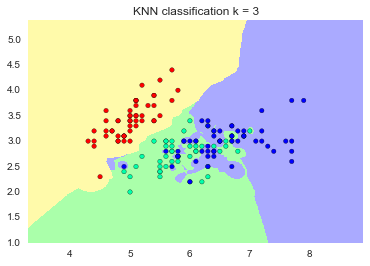

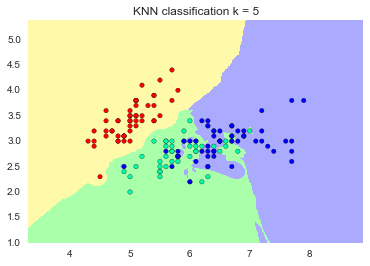

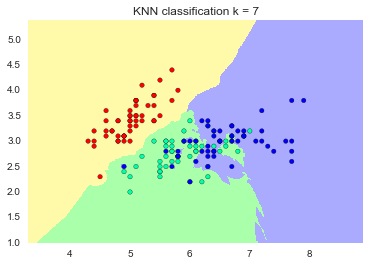

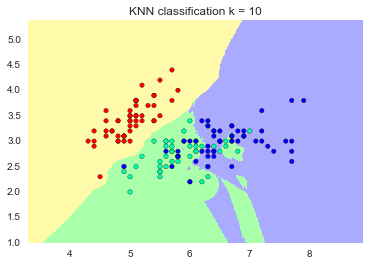

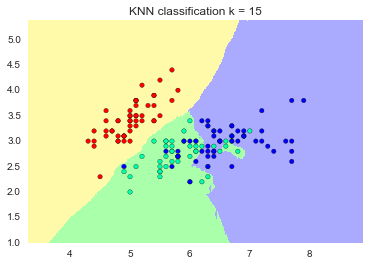

In [32]:
for nb in k_list:
    knn = neighbors.KNeighborsClassifier(nb,weights = 'distance',algorithm = 'auto')
    
    knn.fit(training_data,training_data_label)
    
    test_data_labels = knn.predict(test_data)
    
    test_data_labels = test_data_labels.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx,yy,test_data_labels,cmap = cmap_light)

    plt.scatter(training_data[:,0],training_data[:,1],c = training_data_label,cmap = cmap_bold)
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())
    plt.title('KNN classification k = '+'{:d}'.format(nb))
    plt.plot()

In [26]:
test_data_labels

array([0, 0, 0, ..., 2, 2, 2])

In [38]:
training_data = [[10],[11],[12],[30],[40],[88]]

In [39]:
training_response = [0.,0.,0.14,1.0,1.1,1.5]

In [40]:
knn= KNeighborsRegressor(n_neighbors = 3)
knn.fit(training_data,training_response)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [41]:
test_data = [[57.27],[20.88]]
test_data_response = knn.predict(test_data)

In [42]:
test_data_response 

array([ 1.2 ,  0.38])

## Support Vector Machine

In [1]:
from sklearn import svm
import time

In [2]:
x = [[0,0],[-2,0],[1,1],[10,1]]

In [4]:
y = [0,0,1,1]
clf = svm.SVC()

In [6]:
clf.fit(x,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [8]:
predict_label = clf.predict([[2.5,8.]])

In [9]:
predict_label

array([1])

In [10]:
clf ### gamma is anto then it is set as 1/n where n is number of training points

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### four models of svm

In [12]:
clf_linear = svm.SVC(kernel = 'linear')
clf_linear.fit(x,y)
predict_label_linear = clf_linear.predict([[2.5,8.]])
predict_label_linear

array([1])

In [14]:
clf_poly = svm.SVC(kernel = "poly")
clf_poly.fit(x,y)
predict_label_poly = clf_poly.predict([[2.5,8.]])
predict_label_poly

array([1])

In [15]:
clf_sigmoid = svm.SVC(kernel = "sigmoid")
clf_sigmoid.fit(x,y)
predict_label_sigmoid = clf_sigmoid.predict([[2.5,8.]])
predict_label_sigmoid

array([1])

In [18]:
import numpy as np
from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn import svm

In [19]:
iris = datasets.load_iris()
data = iris.data
label = iris.target

In [20]:
data.shape

(150, 4)

In [21]:
test_percentage = 0.3
training_data,test_data, training_data_label, test_data_label = train_test_split(data, label, test_size = test_percentage, random_state = 42)

In [22]:
len(training_data)

105

In [23]:
N= 7
training_data[0:N]

array([[ 5.5,  2.4,  3.7,  1. ],
       [ 6.3,  2.8,  5.1,  1.5],
       [ 6.4,  3.1,  5.5,  1.8],
       [ 6.6,  3. ,  4.4,  1.4],
       [ 7.2,  3.6,  6.1,  2.5],
       [ 5.7,  2.9,  4.2,  1.3],
       [ 7.6,  3. ,  6.6,  2.1]])

In [24]:
training_data_label[0:N]

array([1, 2, 2, 1, 2, 1, 2])

In [26]:
svm_learning_machine = svm.SVC(kernel = 'rbf',tol = 0.0001, gamma = 0.5, C=1)
svm_learning_machine.fit(training_data, training_data_label)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.0001, verbose=False)

In [28]:
predicted_test_data_label = svm_learning_machine.predict(test_data)

In [29]:
predicted_test_data_label 

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0,
       2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0])

In [30]:
test_data_label

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0,
       2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0])

In [31]:
learning_accuracy = svm_learning_machine.score(test_data, test_data_label)
learning_accuracy

1.0

### sensitivity is TF/(TF+FN)
### specificity  = TN/(TN+fp)

In [3]:
from sklearn import svm
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import SGDClassifier
import time

In [5]:
x = [[0,0],[10,10],[10,0],[0,10]]
y = [0,0,1,1]
test_data = [[2.5,8.]]
n_d= 50
rbf_feature = RBFSampler(n_components = n_d, gamma = 0.5, random_state =1)
print(rbf_feature)

RBFSampler(gamma=0.5, n_components=50, random_state=1)


In [12]:
for n_d in list([100,200,5000,1000]):
    rbf_feature = RBFSampler(n_components = n_d, gamma = 0.5, random_state =1)
    print(rbf_feature)
    
    x_features = rbf_feature.fit_transform(x)
    test_features = rbf_feature.fit_transform(test_data)
    for i in range(0,len(x_features)):
        print("features " + "{:d}".format(i) +"in feature space")
        print(str(x_features[i]),"\n"+"**")
    clf = SGDClassifier()
    clf.fit(x_features,y)
    predicted_label = clf.predict(test_features)
    print(predicted_label)

RBFSampler(gamma=0.5, n_components=100, random_state=1)
features 0in feature space
[ 0.09317615 -0.06236118 -0.06751522 -0.13473764 -0.10436174 -0.11979075
 -0.1151801  -0.05810292 -0.10191676 -0.12805527  0.13950975 -0.06197658
  0.04490839 -0.12668634 -0.07827094  0.04170145  0.10309069  0.11638538
 -0.07372585 -0.01790838 -0.00210292  0.08660647 -0.13928258  0.04552382
 -0.12700477 -0.01495117 -0.14041357  0.01850375 -0.12839064 -0.1381517
 -0.07778379  0.12863123 -0.10182033  0.1240882   0.14059795  0.05891447
  0.0535927   0.0999759  -0.053369   -0.12815251  0.07504712 -0.13837025
 -0.07961699  0.02208811 -0.11819522 -0.0539306   0.12231373  0.11923215
 -0.00632304  0.10846049  0.04960405 -0.14142087 -0.01897091  0.03672174
  0.00174729  0.08432265 -0.12210947 -0.10508561  0.01448842  0.11337608
 -0.14072002 -0.13996518  0.08119319 -0.10198644 -0.1360488  -0.08012341
  0.08699688  0.00135756  0.02470901 -0.14037723  0.03110677  0.14003164
 -0.06369868  0.09868611  0.07927704 -0.13

In [8]:
x_features = rbf_feature.fit_transform(x)
test_features = rbf_feature.fit_transform(test_data)
for i in range(0,len(x_features)):
    print("features " + "{:d}".format(i) +"in feature space")
    print(str(x_features[i]),"\n"+"**")
    time.sleep(2)
    

features 0in feature space
[ 0.07023065 -0.15237513  0.13088237 -0.00361685 -0.18764251  0.13088514
  0.18599335  0.14463287  0.19221508  0.15609069  0.03040618 -0.04609136
 -0.18608593  0.19937794  0.17989518  0.19578737 -0.18196885  0.0578546
 -0.00292251 -0.00775671  0.06723954 -0.17443228  0.19646216  0.11430996
  0.01274903 -0.19984678 -0.14583181  0.09522653  0.11054773  0.19863924
  0.18095356 -0.19926435 -0.15700155 -0.18157523 -0.08214526  0.19948861
 -0.17541535 -0.14591511 -0.18983972 -0.00586209 -0.09719435 -0.01872102
  0.1828783  -0.13698653 -0.13716798  0.04952615  0.00346256  0.18277557
 -0.01295326  0.06745731] 
**
features 1in feature space
[ 0.13697082  0.1211836   0.05633354 -0.19891872 -0.16097679 -0.16687281
  0.09396841 -0.1554872   0.19981507  0.14634757 -0.11964624 -0.17997696
  0.13029738  0.17926418 -0.11353122  0.16437155  0.16561606  0.03128471
  0.05936308 -0.18974473  0.1222225  -0.16153638 -0.10753318  0.19338764
  0.08972926  0.07694304  0.18454958 -0.1

In [9]:
print("the transformed test data in feature space ^^ \n")
print(str(test_features)+'\n')
time.sleep(2)

the transformed test data in feature space ^^ 

[[ 0.10245698 -0.06662071  0.06336734  0.14177991 -0.13263657  0.19587354
   0.08785588  0.19993732 -0.19515189  0.13200811  0.11441873 -0.19947688
   0.17245862 -0.1984546   0.12249458 -0.18275469  0.18610698  0.04863607
   0.18946676  0.06460952  0.17453248 -0.15766378 -0.19584021  0.10467338
   0.19999989 -0.12060948  0.08380248 -0.19953456 -0.11050502  0.06201764
  -0.19945593  0.17940115 -0.1807242   0.00584099 -0.06509857  0.1321647
  -0.03904002  0.19175491 -0.13364253 -0.19820956  0.14629717  0.1200924
  -0.0512243   0.02477529  0.07462512  0.18809346 -0.1548293   0.19298118
  -0.19861882  0.18553311]]



In [10]:
clf = SGDClassifier()
clf.fit(x_features,y)
predicted_label = clf.predict(test_features)
print("\n The predicted label is ---->" +str(predicted_label))
time.sleep(2)


 The predicted label is ---->[1]


In [14]:
###############################################################
## cisc5352.lecture.8.demoKNNSVMIVPrecition.py
## This is a sample file for CISC5352: Financial data analytics
## Author: Henry Han
## Last update: Nov 14, 2016
################################################################

# Import packages

from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn import svm
import numpy as np
import csv
import time

######################################
##  Read data from CSV file
#######################################

filename='Option_Data_2000.csv' # aka 'cisc5352.project.1.option_data.csv' first 2000 features
Data    = csv.reader(open(filename, 'r'))

# Save the original data into list
Data_input    = []
Data_response = []

# Read the data from csv file
# response variable: implied volaility

for row in Data:
    Data_response.append(row[7])  # implied volaility
    row.pop(7)
    Data_input.append(row)

# Delete the header information in data and response variables
Data_response.pop(0)
Data_input.pop(0)


# Convert the data from string to float: a wordy approach
Data_input_convert    = []
Data_response_convert = []

for each_row in Data_input:
    temp = []
    for entry in each_row:
        temp.append(float(entry))
    Data_input_convert.append(temp)

for response_variable_entry in Data_response:
    Data_response_convert.append(float(response_variable_entry))

Data_input    = Data_input_convert
Data_response = Data_response_convert



# Pick only first N samples
N             = 1000    # large N can lead a slow SVM!
Data_input    = Data_input[0:N]
Data_response = Data_response[0:N]

# Split the data set into training data(80%) and testing data(20%)

Input_train, Input_test, Response_train, Response_test = \
    train_test_split(Data_input, Data_response, test_size=0.2, random_state=42)


## Mean square error: MSE
def get_MSE(Error):
    mse=np.sum(np.power(Error,2))
    mse=mse/len(Error)
    return mse


# Train the model via KNN regression
# k=5 for training
kNN = KNeighborsRegressor(n_neighbors=5, weights='distance')
kNN.fit(Input_train, Response_train)

## performance analysis parameters

Error_KNN   = [None] * len(Input_test)
predictedIV = Error_KNN

##predicted implied votatility
predictedIV = kNN.predict(Input_test)
Error_KNN   = abs(Response_test - predictedIV)


# Model Evaluation

print('\n\nThe KNN Model Peformance Summary as follows:')
print('The MSE is           {:20.16f}'.format(get_MSE(Error_KNN)))
print('The mean error is    {:20.16f}'.format(np.mean(Error_KNN)))
print('The maximum error is {:20.16f}'.format(max(Error_KNN)))
print('The minimum error is {:20.16f}'.format(min(Error_KNN)))


print('\n')

# 'poly cab take more time than 'linear' and 'rbf'
kernel_list=['linear', 'rbf']

# print Input_train

for kernel in kernel_list:
    print("\n Wait, SVM  results under kernel: " + str(kernel)+ "\n")
    t = svm.SVR(kernel=kernel, cache_size=500)
    t.fit(Input_train, Response_train)

    ##predicted implied votatility
    predictedSVMIV = t.predict(Input_test)


    Error_SVM = [None] * len(Input_test)
    Error_SVM   = abs(Response_test - predictedSVMIV)


# Model Evaluation

    print('\n\nThe SVM Model Peformance Summary as follows:')
    print('The MSE is           {:20.16f}'.format(get_MSE(Error_SVM)))
    print('The mean error is    {:20.16f}'.format(np.mean(Error_SVM)))
    print('The maximum error is {:20.16f}'.format(max(Error_SVM)))
    print('The minimum error is {:20.16f}'.format(min(Error_SVM)))



The KNN Model Peformance Summary as follows:
The MSE is             0.0161476523331030
The mean error is      0.0680649351366770
The maximum error is   0.6138672624020001
The minimum error is   0.0000527025658843



 Wait, SVM  results under kernel: linear



The SVM Model Peformance Summary as follows:
The MSE is             0.0244341015628781
The mean error is      0.1052417579064514
The maximum error is   0.6225878559423921
The minimum error is   0.0009444251008787

 Wait, SVM  results under kernel: rbf



The SVM Model Peformance Summary as follows:
The MSE is             0.0330511447496893
The mean error is      0.1443892917728555
The maximum error is   0.5781386181941466
The minimum error is   0.0001565150657087


In [17]:
from sklearn import datasets
from sklearn.cross_validation import cross_val_score
iris = datasets.load_iris()
data = iris.data
label=  iris.target
kernel = 'rbf'
clf = svm.SVC(kernel = kernel, gamma = 0.5, C = 1)
k =10
scores = cross_val_score(clf, data,label, cv= k)
print(scores)

[ 1.          0.93333333  1.          1.          0.93333333  1.
  0.93333333  1.          1.          1.        ]


In [ ]:
###############################################################
## cisc5352.lecture.8.demoKNNSVMIVPrecition.py
## This is a sample file for CISC5352: Financial data analytics
## Author: Henry Han
## Last update: Nov 14, 2016
################################################################

# Import packages

from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn import svm
import numpy as np
import csv
import time

######################################
##  Read data from CSV file
#######################################

filename='Option_Data_2000.csv' # aka 'cisc5352.project.1.option_data.csv' first 2000 features
Data    = csv.reader(open(filename, 'r'))

# Save the original data into list
Data_input    = []
Data_response = []

# Read the data from csv file
# response variable: implied volaility

for row in Data:
    Data_response.append(row[7])  # implied volaility
    row.pop(7)
    Data_input.append(row)

# Delete the header information in data and response variables
Data_response.pop(0)
Data_input.pop(0)


# Convert the data from string to float: a wordy approach
Data_input_convert    = []
Data_response_convert = []

for each_row in Data_input:
    temp = []
    for entry in each_row:
        temp.append(float(entry))
    Data_input_convert.append(temp)

for response_variable_entry in Data_response:
    Data_response_convert.append(float(response_variable_entry))

Data_input    = Data_input_convert
Data_response = Data_response_convert



# Pick only first N samples
N             = 1000    # large N can lead a slow SVM!
Data_input    = Data_input[0:N]
Data_response = Data_response[0:N]

# Split the data set into training data(80%) and testing data(20%)

Input_train, Input_test, Response_train, Response_test = \
    train_test_split(Data_input, Data_response, test_size=0.2, random_state=42)


## Mean square error: MSE
def get_MSE(Error):
    mse=np.sum(np.power(Error,2))
    mse=mse/len(Error)
    return mse

kNN = KNeighborsRegressor(n_neighbors=5, weights='distance')
kNN.fit(Input_train, Response_train)

## performance analysis parameters

Error_KNN   = [None] * len(Input_test)
predictedIV = Error_KNN

##predicted implied votatility
predictedIV = kNN.predict(Input_test)
Error_KNN   = abs(Response_test - predictedIV)


# Model Evaluation

print('\n\nThe KNN Model Peformance Summary as follows:')
print('The MSE is           {:20.16f}'.format(get_MSE(Error_KNN)))
print('The mean error is    {:20.16f}'.format(np.mean(Error_KNN)))
print('The maximum error is {:20.16f}'.format(max(Error_KNN)))
print('The minimum error is {:20.16f}'.format(min(Error_KNN)))


print('\n')

# 'poly cab take more time than 'linear' and 'rbf'
kernel_list=['linear', 'rbf']

# print Input_train

for kernel in kernel_list:
    print("\n Wait, SVM  results under kernel: " + str(kernel)+ "\n")
    t = svm.SVR(kernel=kernel, cache_size=500)
    t.fit(Input_train, Response_train)

    ##predicted implied votatility
    predictedSVMIV = t.predict(Input_test)


    Error_SVM = [None] * len(Input_test)
    Error_SVM   = abs(Response_test - predictedSVMIV)


# Model Evaluation

    print('\n\nThe SVM Model Peformance Summary as follows:')
    print('The MSE is           {:20.16f}'.format(get_MSE(Error_SVM)))
    print('The mean error is    {:20.16f}'.format(np.mean(Error_SVM)))
    print('The maximum error is {:20.16f}'.format(max(Error_SVM)))
    print('The minimum error is {:20.16f}'.format(min(Error_SVM)))

In [19]:
from sklearn import ensemble
# Train the model via KNN regression
# k=5 for training
params = {'n_estimators':1000,'max_depth':6, 'min_samples_split':2, 'learning_rate':0.01, 'loss':'ls'}
gb = ensemble.GradientBoostingRegressor(**params)
gb.fit(Input_train, Response_train)

GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.01, loss='ls',
             max_depth=6, max_features=None, max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=1000,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [21]:
Error_KNN   = [None] * len(Input_test)
predictedIV = Error_KNN

##predicted implied votatility
predictedIV = gb.predict(Input_test)
Error_gb  = abs(Response_test - predictedIV)
print(Error_gb)

[  9.14468954e-03   3.12921126e-03   2.01261537e-02   7.92557872e-03
   1.66646392e-02   9.23873394e-02   4.26936770e-02   2.80732783e-02
   5.70874790e-03   2.06936823e-02   8.20164532e-04   3.89585809e-03
   3.55621607e-02   7.86061222e-03   1.65740749e-01   6.88540492e-02
   2.67584836e-02   1.56717410e-02   2.41317381e-02   2.02936173e-02
   2.69337889e-01   5.89571915e-04   9.14051911e-03   2.60018409e-02
   5.41867075e-02   8.33482274e-03   6.10113334e-03   1.66792882e-02
   1.81163307e-03   1.49881480e-01   1.48442224e-03   9.40474395e-03
   1.84082283e-02   1.39724846e-01   1.27395514e-03   4.07596065e-02
   6.56517925e-02   2.28337671e-02   2.26306558e-03   9.83418198e-02
   4.41144809e-02   2.33934592e-02   1.83168972e-02   2.38040052e-02
   4.59350259e-02   8.29316419e-03   2.74940242e-02   2.88962881e-02
   3.97116450e-02   7.56579875e-02   8.65061944e-03   3.24744751e-02
   6.56700084e-02   8.33344308e-04   2.61699083e-02   1.20499474e-02
   3.83881690e-02   3.83999692e-02

In [23]:
import numpy as np
np.mean(Error_gb)

0.062825786255800264

In [25]:
params = {'n_estimators':20,'min_samples_split':2}
rf = ensemble.GradientBoostingRegressor(**params)
rf.fit(Input_train, Response_train)
Error_rf   = [None] * len(Input_test)
predictedIV = Error_rf

##predicted implied votatility
predictedIV = rf.predict(Input_test)
Error_rf  = abs(Response_test - predictedIV)
np.mean(Error_rf)

0.10470630987690045